In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as mplt
from keras.models import Sequential
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('/Users/apple/Downloads/Data-sets/customer_churn-1.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
# a
data[data['gender'] == 'Male']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
# b
data[data['InternetService'] == 'DSL']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,...,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No


In [6]:
# c
new_customer = data[(data['gender'] == 'Female') & (data['SeniorCitizen'] == 1) & (data['PaymentMethod'] == 'Mailed check')]
new_customer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.7,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.4,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.6,No
694,2682-KEVRP,Female,1,No,No,22,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,20.05,417,No
747,3966-HRMZA,Female,1,No,No,3,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Mailed check,75.05,202.9,No
947,9904-EHEVJ,Female,1,Yes,Yes,32,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,91.35,2896.55,No
1029,4184-TJFAN,Female,1,Yes,Yes,3,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,88.30,273.75,Yes
1112,2176-LVPNX,Female,1,No,No,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,89.85,6293.45,No


In [7]:
data[(data['tenure'] < 10) | (data['TotalCharges'] < '500')]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [8]:
import seaborn as sb

In [9]:
names = data['Churn'].value_counts().keys().tolist()
length = data['Churn'].value_counts().tolist()
print(names)
length

['No', 'Yes']


[5174, 1869]

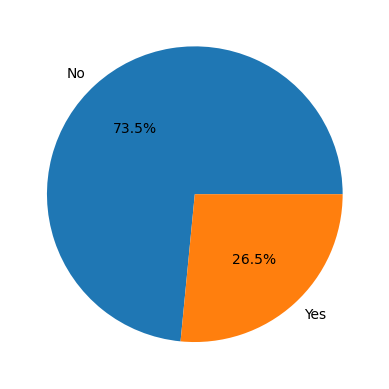

In [223]:
mplt.pie(length,labels=names,autopct='%0.1f%%');

<Axes: xlabel='InternetService'>

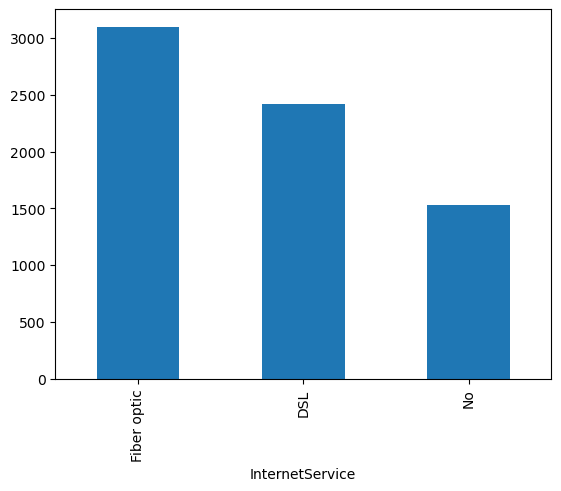

In [224]:
data['InternetService'].value_counts().plot(kind='bar')

In [225]:
x = data[['tenure']]
x.shape

(7043, 1)

In [226]:
y = data['Churn']
y.shape

(7043,)

In [227]:
y_int = []
for kk in y:
    if kk == 'No':
        y_int.append(0)
    else:
        y_int.append(1)

In [228]:
y = np.array(y_int)
y.shape

(7043,)

In [243]:
y = y.reshape(-1,1)
y.shape

(7043, 1)

In [244]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)

In [245]:
print('Train dataset shape »»',x_train.shape,y_train.shape)
print('Test dataset shape »»',x_test.shape,y_test.shape)

Train dataset shape »» (4930, 1) (4930, 1)
Test dataset shape »» (2113, 1) (2113, 1)


In [246]:
from keras.layers import Dense
from tensorflow.keras import layers

In [247]:
model1 = Sequential()
model1.add(Dense(12,activation='relu',input_shape=(4930,1)))
model1.add(Dense(8,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

In [248]:
model1.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 4930, 12)          24        
                                                                 
 dense_44 (Dense)            (None, 4930, 8)           104       
                                                                 
 dense_45 (Dense)            (None, 4930, 1)           9         
                                                                 
Total params: 137 (548.00 Byte)
Trainable params: 137 (548.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [249]:
model1.compile(loss='binary_crossentropy',
               metrics=['accuracy'],
               optimizer='adam')


In [250]:
history = model1.fit(x_train,y_train,epochs=100,batch_size=512,validation_data=(x_test,y_test))

Epoch 1/100


2024-03-02 18:38:47.709030: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - ETA: 0s - loss: 0.7674 - accuracy: 0.7300

2024-03-02 18:38:48.773953: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 2s 90ms/step - loss: 0.7674 - accuracy: 0.7300 - val_loss: 0.7443 - val_accuracy: 0.7407
Epoch 2/100
10/10 [==============================] - 0s 27ms/step - loss: 0.6959 - accuracy: 0.7298 - val_loss: 0.6755 - val_accuracy: 0.7407
Epoch 3/100
10/10 [==============================] - 0s 24ms/step - loss: 0.6338 - accuracy: 0.7298 - val_loss: 0.6161 - val_accuracy: 0.7407
Epoch 4/100
10/10 [==============================] - 0s 24ms/step - loss: 0.5839 - accuracy: 0.7323 - val_loss: 0.5678 - val_accuracy: 0.7643
Epoch 5/100
10/10 [==============================] - 0s 25ms/step - loss: 0.5437 - accuracy: 0.7497 - val_loss: 0.5356 - val_accuracy: 0.7662
Epoch 6/100
10/10 [==============================] - 0s 26ms/step - loss: 0.5185 - accuracy: 0.7519 - val_loss: 0.5196 - val_accuracy: 0.7634
Epoch 7/100
10/10 [==============================] - 0s 23ms/step - loss: 0.5105 - accuracy: 0.7538 - val_loss: 0.5154 - val_accuracy: 0.7634
Epoch 8/100
10/10 

In [251]:
loss,accu = model1.evaluate(x_test,y_test)

67/67 [==============================] - 1s 15ms/step - loss: 0.5146 - accuracy: 0.7662


In [252]:
print(f'Loss is : {loss*100:.2f} and the accuracy is : {accu*100:.2f}')

Loss is : 51.46 and the accuracy is : 76.62


In [256]:
y_preds = model1.predict(x_test)
y_preds

67/67 [==============================] - 0s 6ms/step


array([[[0.49901906]],

       [[0.35903007]],

       [[0.10507541]],

       ...,

       [[0.09402803]],

       [[0.09758975]],

       [[0.32211947]]], dtype=float32)

In [257]:
y_preds_converted = []
for hh in y_preds:
    if hh < 0.5:
        y_preds_converted.append(0)
    else:
        y_preds_converted.append(1)

In [267]:
np.array(y_preds_converted).shape

(2113,)

In [268]:
from sklearn.metrics import classification_report as cr

In [270]:
print(cr(y_test,y_preds_converted))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86      1569
           1       0.63      0.23      0.33       544

    accuracy                           0.77      2113
   macro avg       0.70      0.59      0.60      2113
weighted avg       0.74      0.77      0.72      2113



In [271]:
from tensorflow.keras.layers import Dropout

In [283]:
model2 = Sequential()
model2.add(Dense(12,activation='relu',input_dim=1))
model2.add(Dropout(0.3))
model2.add(Dense(8,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1,activation='sigmoid'))

In [284]:
model2.compile(loss='binary_crossentropy',
               metrics=['accuracy'],
               optimizer='adam')

In [285]:
fit_info = model2.fit(x_train,y_train,epochs=150,validation_data=(x_test,y_test))

Epoch 1/150


2024-03-02 19:56:41.846921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


155/155 [==============================] - ETA: 0s - loss: 3.5041 - accuracy: 0.5966

2024-03-02 19:56:46.828896: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


155/155 [==============================] - 6s 31ms/step - loss: 3.5041 - accuracy: 0.5966 - val_loss: 1.4634 - val_accuracy: 0.7407
Epoch 2/150
155/155 [==============================] - 2s 15ms/step - loss: 2.3690 - accuracy: 0.6487 - val_loss: 1.4478 - val_accuracy: 0.7407
Epoch 3/150
155/155 [==============================] - 2s 14ms/step - loss: 1.6941 - accuracy: 0.6744 - val_loss: 1.0446 - val_accuracy: 0.7615
Epoch 4/150
155/155 [==============================] - 2s 15ms/step - loss: 1.1981 - accuracy: 0.7002 - val_loss: 0.8401 - val_accuracy: 0.7591
Epoch 5/150
155/155 [==============================] - 2s 15ms/step - loss: 0.9081 - accuracy: 0.6907 - val_loss: 0.7813 - val_accuracy: 0.7511
Epoch 6/150
155/155 [==============================] - 2s 14ms/step - loss: 0.8276 - accuracy: 0.6929 - val_loss: 0.6676 - val_accuracy: 0.7487
Epoch 7/150
155/155 [==============================] - 2s 14ms/step - loss: 0.7467 - accuracy: 0.7012 - val_loss: 0.6223 - val_accuracy: 0.7430
Epoc

In [286]:
from sklearn.metrics import confusion_matrix as cm

In [287]:
loss,acc = model2.evaluate(x_test,y_test)

67/67 [==============================] - 0s 6ms/step - loss: 0.5287 - accuracy: 0.7615


In [288]:
y_preds2 = model2.predict(x_test)
y_preds2

67/67 [==============================] - 0s 2ms/step


2024-03-02 20:07:49.161673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[0.50108063],
       [0.4085721 ],
       [0.20012061],
       ...,
       [0.18759327],
       [0.19170071],
       [0.3830118 ]], dtype=float32)

In [289]:
y_preds2_onezero = []
for ss in y_preds2:
    if ss < 0.5 :
        y_preds2_onezero.append(0)
    else:
        y_preds2_onezero.append(1)

In [290]:
y_preds2_onezero

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,


In [292]:
cm(y_test,y_preds2_onezero)

array([[1457,  112],
       [ 392,  152]])

In [293]:
print(cr(y_test,y_preds2_onezero))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85      1569
           1       0.58      0.28      0.38       544

    accuracy                           0.76      2113
   macro avg       0.68      0.60      0.61      2113
weighted avg       0.73      0.76      0.73      2113



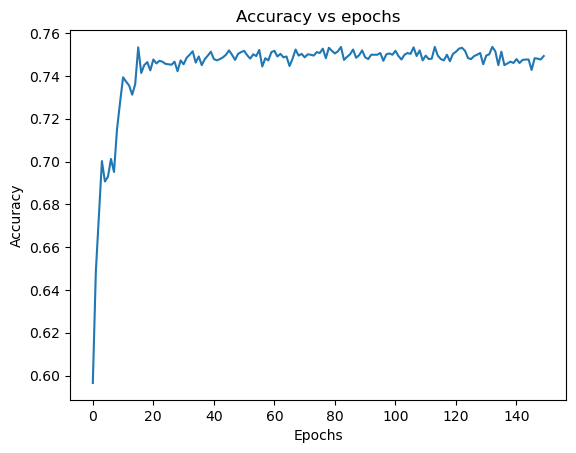

In [297]:
mplt.plot(fit_info.history['accuracy'])
mplt.title('Accuracy vs epochs')
mplt.xlabel('Epochs')
mplt.ylabel('Accuracy')
mplt.show();

In [4]:
tc = pd.to_numeric(data['TotalCharges'],errors='coerce')

In [5]:
three_feature = data[['tenure','MonthlyCharges']]
three_feature

,tenure,MonthlyCharges
0,1,29.85
1,34,56.95
2,2,53.85
3,45,42.30
4,2,70.70
...,...,...
7038,24,84.80
7039,72,103.20
7040,11,29.60
7041,4,74.40


In [6]:
three_feature.insert(2,'Total_charges',tc)

In [7]:
three_feature.dtypes

tenure              int64
MonthlyCharges    float64
Total_charges     float64
dtype: object

In [8]:
three_feature.isna().sum()

tenure             0
MonthlyCharges     0
Total_charges     11
dtype: int64

In [9]:
np.mean(three_feature['Total_charges'])

2283.3004408418656

In [10]:
three_feature['Total_charges'] = three_feature['Total_charges'].fillna(2283.30)

/var/folders/gz/21q9n7_n30s76c_y9b8rl7zm0000gn/T/ipykernel_2019/684518582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  three_feature['Total_charges'] = three_feature['Total_charges'].fillna(2283.30)


In [11]:
three_feature.isna().sum()

tenure            0
MonthlyCharges    0
Total_charges     0
dtype: int64

In [12]:
target1 = []
for k in data['Churn']:
    if k == 'No':
        target1.append(0)
    else:
        target1.append(1)

In [13]:
target1 = np.array(target1)

In [14]:
x_train,x_test,y_train,y_test = train_test_split(three_feature,target1,test_size=0.2,random_state=89)

In [15]:
print(x_train.shape,y_train.shape)
x_test.shape,y_test.shape

(5634, 3) (5634,)


((1409, 3), (1409,))

In [16]:
from keras.layers import Dense

In [17]:
model3 = Sequential()
model3.add(Dense(12,activation='relu',input_dim=3))
model3.add(Dense(8,activation='relu'))
model3.add(Dense(1,activation='sigmoid'))

2024-03-02 22:55:34.248545: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-03-02 22:55:34.248576: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-03-02 22:55:34.248584: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-03-02 22:55:34.248636: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-02 22:55:34.248664: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [18]:
model3.compile(loss='binary_crossentropy',
               metrics=['accuracy'],
               optimizer='adam')

In [19]:
from tensorflow.keras.callbacks import EarlyStopping 

In [20]:
ES = EarlyStopping(monitor='accuracy',patience=6,restore_best_weights=True)

In [21]:
fit_info1 = model3.fit(x_train,y_train,epochs=150,validation_data=(x_test,y_test))

Epoch 1/150


2024-03-02 22:55:40.211370: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


177/177 [==============================] - ETA: 0s - loss: 27.5211 - accuracy: 0.6049

2024-03-02 22:55:42.669814: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


177/177 [==============================] - 3s 14ms/step - loss: 27.5211 - accuracy: 0.6049 - val_loss: 6.3291 - val_accuracy: 0.6430
Epoch 2/150
177/177 [==============================] - 2s 12ms/step - loss: 4.2178 - accuracy: 0.6340 - val_loss: 2.5720 - val_accuracy: 0.7197
Epoch 3/150
177/177 [==============================] - 2s 12ms/step - loss: 1.7699 - accuracy: 0.7142 - val_loss: 0.8478 - val_accuracy: 0.7828
Epoch 4/150
177/177 [==============================] - 2s 12ms/step - loss: 1.0936 - accuracy: 0.7382 - val_loss: 1.4099 - val_accuracy: 0.7821
Epoch 5/150
177/177 [==============================] - 2s 12ms/step - loss: 1.1868 - accuracy: 0.7345 - val_loss: 1.2474 - val_accuracy: 0.7857
Epoch 6/150
177/177 [==============================] - 2s 12ms/step - loss: 0.9388 - accuracy: 0.7357 - val_loss: 0.8096 - val_accuracy: 0.6011
Epoch 7/150
177/177 [==============================] - 2s 12ms/step - loss: 1.4439 - accuracy: 0.7272 - val_loss: 0.7316 - val_accuracy: 0.7828
Epo

In [22]:
loss,accu = model3.evaluate(x_test)

45/45 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


2024-03-02 23:00:42.313781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [27]:
y_preds = model3.predict(x_test)
y_preds

45/45 [==============================] - 0s 2ms/step


array([[0.9914199 ],
       [0.94849217],
       [0.15132068],
       ...,
       [0.9638511 ],
       [0.9368105 ],
       [0.9697953 ]], dtype=float32)

In [29]:
y_preds_list = []
for yy in y_preds:
    if yy < 0.5:
        y_preds_list.append(0)
    else:
        y_preds_list.append(1)

In [32]:
from sklearn.metrics import confusion_matrix as cm

In [33]:
cm(y_test,y_preds_list)

array([[350, 694],
       [ 30, 335]])

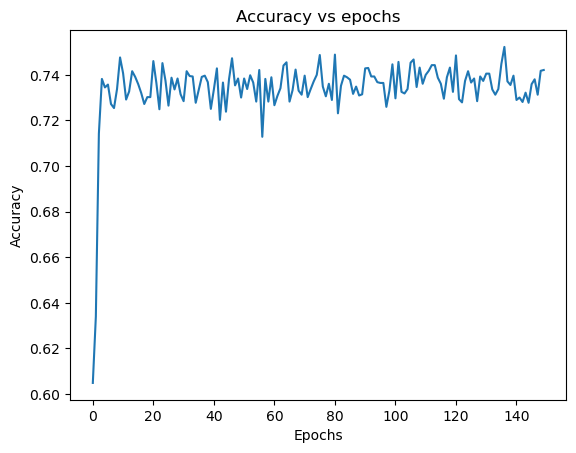

In [36]:
mplt.plot(fit_info1.history['accuracy'])
mplt.title('Accuracy vs epochs')
mplt.xlabel('Epochs')
mplt.ylabel('Accuracy')
mplt.show()